### Import Libraries

In [1]:
#Suppress warning
import warnings
warnings.filterwarnings('ignore')

#import the numpy and pandas package
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

### Import Data

In [2]:
#read_file
sd=pd.read_csv("Salary_Data.csv")
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Inspection

In [3]:
sd.shape

(30, 2)

In [4]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
sd.describe().round(decimals=2)

,YearsExperience,Salary
count,30.00,30.00
mean,5.31,76003.00
std,2.84,27414.43
min,1.10,37731.00
25%,3.20,56720.75
50%,4.70,65237.00
75%,7.70,100544.75
max,10.50,122391.00


# Data Cleaning

In [6]:
#Checking Null Values
sd.isnull().sum()
#There are no Null values, hence dataset is clean

YearsExperience    0
Salary             0
dtype: int64

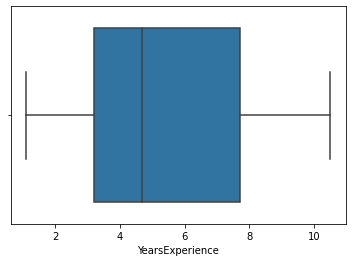

In [7]:
#Outlier Analysis
sns.boxplot(sd['YearsExperience'])
plt.show()
#There is no Outlier present in the data

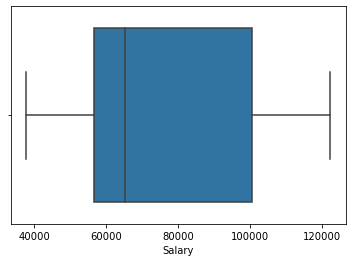

In [8]:
#Outlier Analysis
sns.boxplot(sd['Salary'])
plt.show()
#There is no Outlier present in the data

# Exploratory Data Analysis

In [9]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


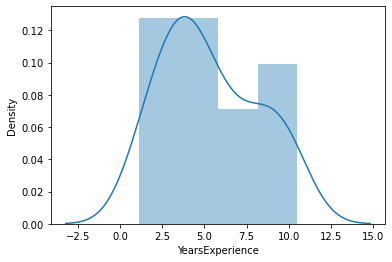

In [10]:
sns.distplot(sd['YearsExperience'])
plt.show()
#Distplot shows normal distribution of the data

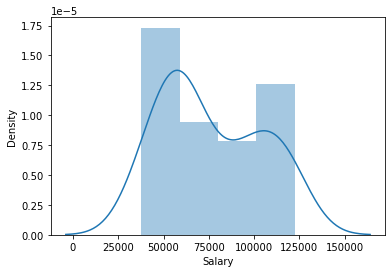

In [11]:
sns.distplot(sd['Salary'])
plt.show()
#Distplot shows normal distribution of the data

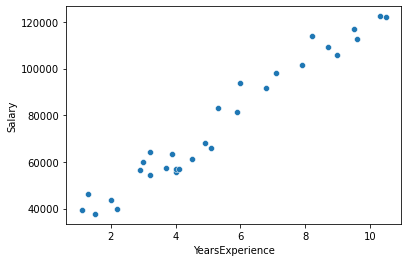

In [12]:
sns.scatterplot(x=sd['YearsExperience'],y=sd['Salary'])
plt.show()
#Scatter plot shows there is no deviation of the datapoints, and there is a positive correlation

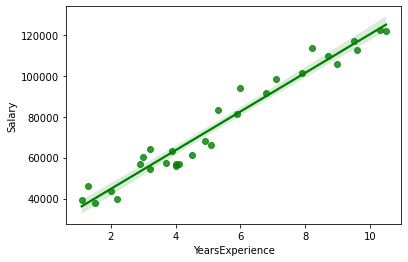

In [13]:
sns.regplot(x=sd['YearsExperience'],y=sd['Salary'], data=sd, color='green')
plt.show()
#Regression plot shows here the positive correlation between dep and indep variables

### Transformations

In [14]:
def transformplot(data):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(data)
    plt.subplot(1,2,2)
    stats.probplot(x=data,dist='norm',plot=plt)
    plt.show()

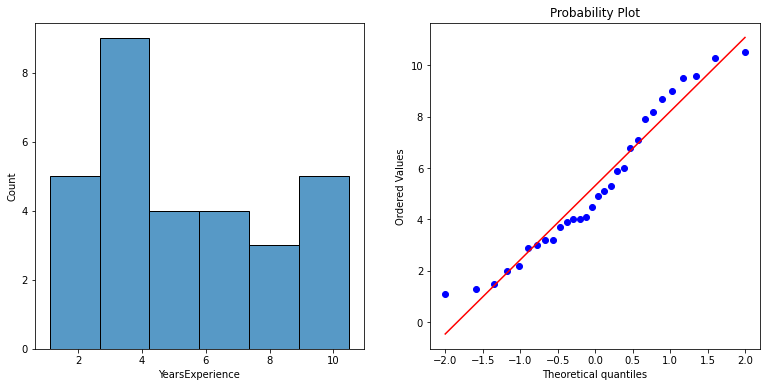

In [15]:
#Plotting actual data without any transformation
transformplot(sd['YearsExperience'])

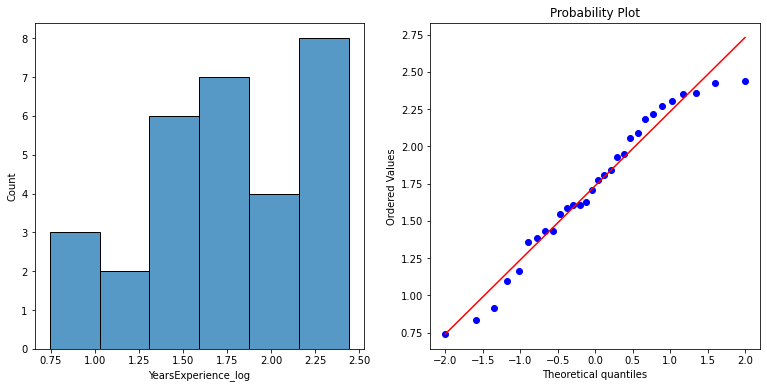

In [16]:
#Logrethemic Transformation
sd['YearsExperience_log']=np.log(sd['YearsExperience']+1)
transformplot(sd['YearsExperience_log'])

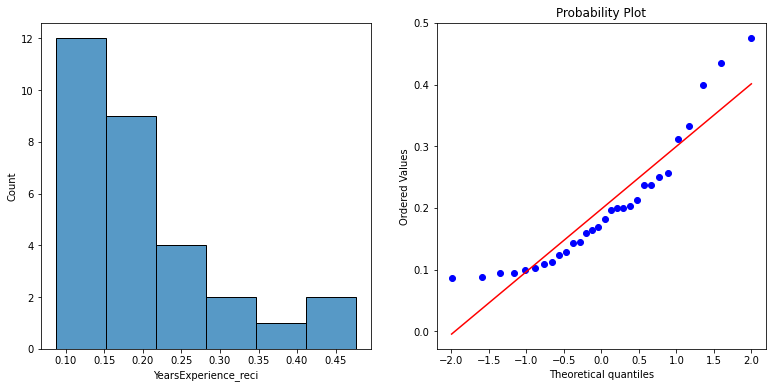

In [17]:
#Reciprocal Transformation
sd['YearsExperience_reci']=1/(sd['YearsExperience']+1)
transformplot(sd['YearsExperience_reci'])

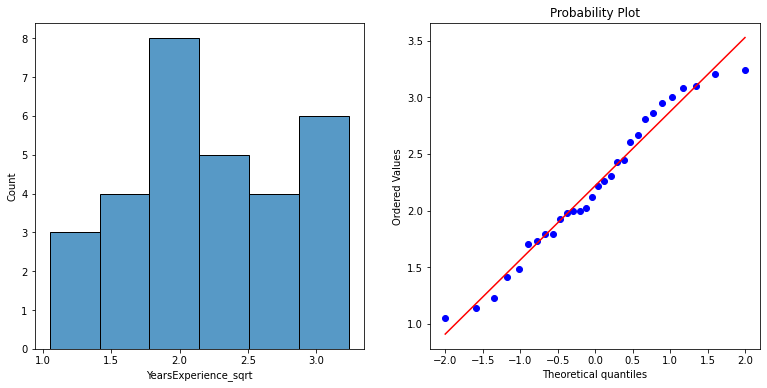

In [18]:
#Square root transformation
sd['YearsExperience_sqrt']=np.sqrt(sd['YearsExperience'])
transformplot(sd['YearsExperience_sqrt'])

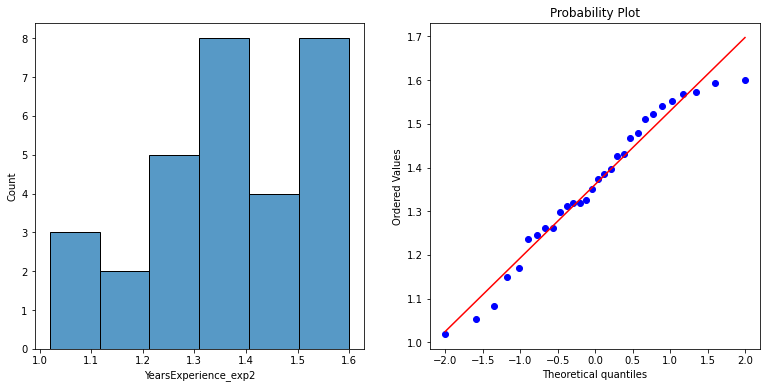

In [19]:
#Exponential Transformation
sd['YearsExperience_exp2']=sd['YearsExperience']**(1/5)
transformplot(sd['YearsExperience_exp2'])

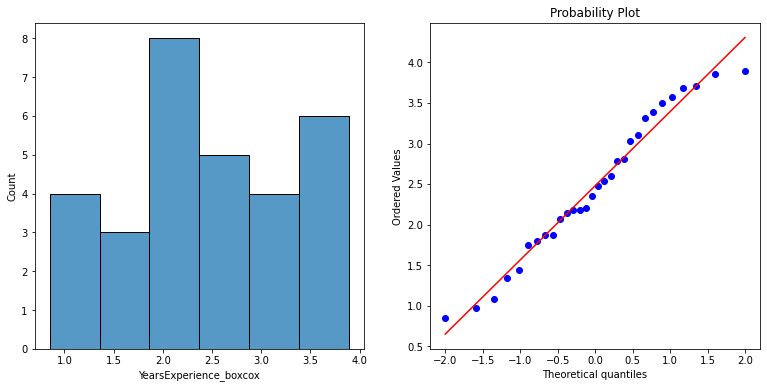

In [20]:
#boxcox Transformation
sd['YearsExperience_boxcox']=stats.boxcox(sd['YearsExperience']+1)[0]
transformplot(sd['YearsExperience_boxcox'])

# Model Building
Performing Simple Linear Regression

In [21]:
model=smf.ols("Salary~YearsExperience",data=sd).fit()

In [22]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [24]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [25]:
print(model.summary())
#model.summary()

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        17:36:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

# Inference
* As seen from the Regression plot, There is linear relationship between YearsExperience & Salary
* As seen from the scatter plot, There is a positive correlation
* As seen from the box plot, there are no outliers in the data
* Since R squared value is 0.957, there is 95.7 % of the data fit the regression model.
* since p value is very low (1.143068e-20<0.05), model fit is statistically significant and YearsExperience is the correct predictor for Salary

# Predictions on the test data

In [26]:
ser=pd.Series([5,10,15])
df1=pd.DataFrame(data=ser,columns=['YearsExperience'])
df1

,YearsExperience
0,5
1,10
2,15


In [27]:
model.predict(df1)

0     73042.011806
1    120291.823413
2    167541.635020
dtype: float64

### End !!!